**Вводные значения**

In [10]:
from typing import Tuple, List

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g

L: float = 10
H: list[float] = [0.5, 1, 1.5, 2, 2.5, 3]
A: list[float] = [0.5, 1, 1.5, 2, 2.5, 3]
m: float = 10
y0: float = 1
x1: float = np.sqrt(2 * L - 1)
x0: float = -x1
dt: float = 0.0001
vy0: float = 0.0
vx0: float = 0.0

In [11]:
def get_next_vy(previous_vy: float) -> float:
    """
    Calculates next y-component of the velocity of the pendulum.
    :param previous_vy: previous y-component of the velocity of the pendulum
    :return: next y-component of the velocity of the pendulum
    """
    return previous_vy + g * dt


def get_next_y(previous_y: float, current_vy: float) -> float:
    """
    Calculates next y coordinate of the pendulum.
    :param previous_y: previous y coordinate of the pendulum
    :param current_vy: current y-component of the velocity of the pendulum
    :return: next y coordinate of the pendulum
    """
    return previous_y - current_vy * dt


def get_next_vx(previous_vx: float, T_4: float) -> float:
    """
    Calculates next x-component of the velocity of the pendulum.
    :param previous_vx: previous x-component of the velocity of the pendulum
    :param T_4: period / 4 time got from y coordinates
    :return: next x-component of the velocity of the pendulum
    """
    return previous_vx + np.sqrt(2 * g) / T_4 * dt


def get_next_x(previous_x: float, current_vx: float) -> float:
    """
    Calculates next x coordinate of the pendulum.
    :param previous_x: previous x coordinate of the pendulum
    :param current_vx: current x-component of the velocity of the pendulum
    :param T_4: period / 4 time got from y coordinates
    :return: next x coordinate of the pendulum
    """
    return previous_x + current_vx * dt

In [12]:
def y_stoppage_condition(
        current_y: float,
        next_velocity_y: float
) -> bool:
    """
    Checks whether ball is contacting with the flat surface 
    (whether next ball's coordinate by y-axis is less than 0).
    :param current_x: current x coordinate of the ball
    :param current_y: current y coordinate of the ball
    :param next_velocity_y: next y-component of the velocity of the ball
    :return: True if the ball's velocity has to be changed, False otherwise
    """

    return get_next_y(current_y, next_velocity_y) < 0.0


def x_horizontal_stoppage_condition(
        current_x: float,
        next_velocity_x: float
) -> bool:
    """
    Checks whether ball is contacting with the flat surface 
    (whether next ball's coordinate by x-axis is less than 0).
    :param current_x: current x coordinate of the ball
    :param next_velocity_x: next x-component of the velocity of the ball
    :return: True if the ball's velocity has to be changed, False otherwise
    """

    return get_next_x(current_x, next_velocity_x) < x0 or get_next_x(current_x, next_velocity_x) > x1


def x_vertical_stoppage_condition(
        current_x: float,
        next_velocity_x: float
) -> bool:
    """
    Checks whether ball is contacting with the flat surface 
    (whether next ball's coordinate by x-axis is less than 0).
    :param current_x: current x coordinate of the ball
    :param next_velocity_x: next x-component of the velocity of the ball
    :return: True if the ball's velocity has to be changed, False otherwise
    """

    return abs(get_next_x(current_x, next_velocity_x)) < 0.001

In [13]:
def get_free_period():
    pass


def get_nailed_period():
    pass


def get_period(nail_is_present: bool) -> float:
    period: float
    if nail_is_present:
        period = get_nailed_period()
    else:
        period = get_free_period()

    return period

**Simulate y track**

In [14]:
def trace_y(iterations: int) -> tuple[list[float], list[float], float, float]:
    Y: list[float] = []
    T: list[float] = []
    y_current: float = y0
    vy_current: float = 0.0
    t_current: float = 0.0
    T_4: float = 0.0
    flag: bool = True
    for i in range(iterations):
        Y.append(y_current)
        T.append(t_current)
        vy_current = get_next_vy(vy_current)
        if y_stoppage_condition(y_current, vy_current):
            if flag: T_4 = t_current
            flag = False
            vy_current *= -1
        y_current = get_next_y(y_current, vy_current)
        t_current += dt
    
    
    
    return Y, T, T_4

In [15]:
def plot_function(data: tuple[list[float], list[float]]) -> None:
    Y, T = data

    plt.plot(T, Y)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

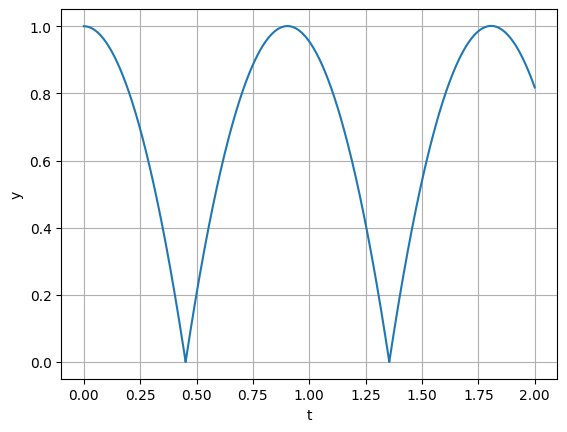

In [16]:
Y = trace_y(20000)
plot_function(Y[:2])

In [17]:
def trace_x(iterations: int) -> tuple[list[float], list[float]]:
    X: list[float] = []
    T: list[float] = []
    T_4 = Y[2]
    x_current: float = x0
    vx_current: float = 0.0
    t_current: float = 0.0
    for i in range(iterations):
        print(t_current, x_current, vx_current)
        X.append(x_current)
        T.append(t_current)
        vx_current = get_next_vx(vx_current, T_4)
        if x_vertical_stoppage_condition(x_current, vx_current):
            vx_current *= -1
        x_current = get_next_x(x_current, vx_current)
        t_current += dt

    return X, T

0.0 -4.358898943540674 0.0
0.0001 -4.358898874181712 0.000693589616980554
0.0002 -4.3588987354637885 0.001387179233961108
0.00030000000000000003 -4.358898527386903 0.002080768850941662
0.0004 -4.358898249951056 0.002774358467922216
0.0005 -4.358897903156247 0.00346794808490277
0.0006000000000000001 -4.358897487002477 0.004161537701883324
0.0007000000000000001 -4.358897001489745 0.004855127318863878
0.0008000000000000001 -4.3588964466180515 0.005548716935844432
0.0009000000000000002 -4.358895822387396 0.006242306552824986
0.0010000000000000002 -4.358895128797779 0.00693589616980554
0.0011000000000000003 -4.3588943658492 0.007629485786786094
0.0012000000000000003 -4.35889353354166 0.008323075403766648
0.0013000000000000004 -4.3588926318751575 0.009016665020747203
0.0014000000000000004 -4.358891660849694 0.009710254637727758
0.0015000000000000005 -4.358890620465268 0.010403844254708312
0.0016000000000000005 -4.358889510721881 0.011097433871688867
0.0017000000000000006 -4.358888331619532 0

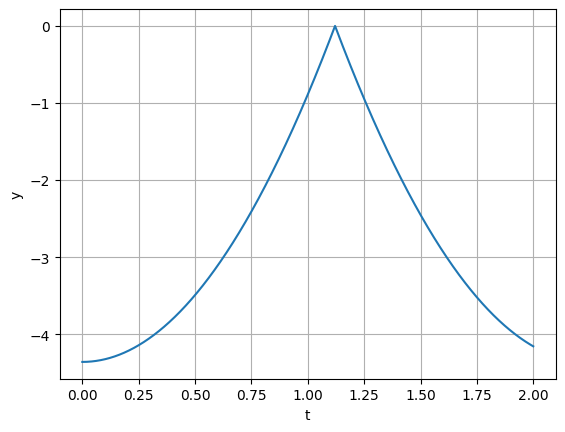

In [18]:
X = trace_x(20000)
plot_function(X)